Mathematical simulation of the traffic situation described in the wikipedia article about Braess's Paradox (see https://en.wikipedia.org/wiki/Braess%27s_paradox#:~:text=Mathematical%20approach%5Bedit%5D). Demonstrates how greedy driver behavior causes the addition of an extra road to slow down traffic for all drivers.


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [173]:
total_number = 400
constant = 45 
divider = total_number/ 40. 
start_point = [200, 200, 0]
crossover_time = 0

In [174]:
#                -->  <- route a
#         T/100   |    45  
#        -        |         -
# start           0 <-route b   end
#        -        |         -  
#          45     |    T/100   
#                -->  <- route c

def route_times(n_a, n_b):
    n_c = total_number - n_a - n_b
    t_a = (n_a + n_c) / divider + 45
    t_b = 45  + (n_b + n_c) / divider
    t_c = (n_a + n_c) / divider + (n_b + n_c) / divider + crossover_time
    
    return t_a, t_b, t_c, n_c

def build_images():
    n_a, n_b = np.meshgrid(np.arange(total_number + 1), np.arange(total_number + 1))
    t_a, t_b, t_c, n_c = route_times(n_a, n_b)
    t_a[n_c < 0] = np.nan
    t_b[n_c < 0] = np.nan
    t_c[n_c < 0] = np.nan
    t_av = (t_a * n_a + t_b * n_b + t_c * n_c) / float(total_number)
    
    return t_a, t_b, t_c, t_av

def greedy_path(start_point, t_as, t_bs, t_cs):
    path = [start_point]
    while True:
        current_point = path[-1].copy()
        for i in range(3):
            n_a, n_b, n_c = current_point
            ts = np.array([t_as[n_b, n_a], t_bs[n_b, n_a], t_cs[n_b, n_a]])
            if current_point[i]:
                current_point[i] -= 1
                current_point[np.argmin(ts)] += 1
        if np.all(current_point == path[-1]) or np.any(current_point < 0):
            break
        else:
            path.append(current_point)
    return np.array(path)

In [175]:
tas, tbs, tcs, tavs = build_images()
path = greedy_path(np.array(start_point), tas, tbs, tcs)

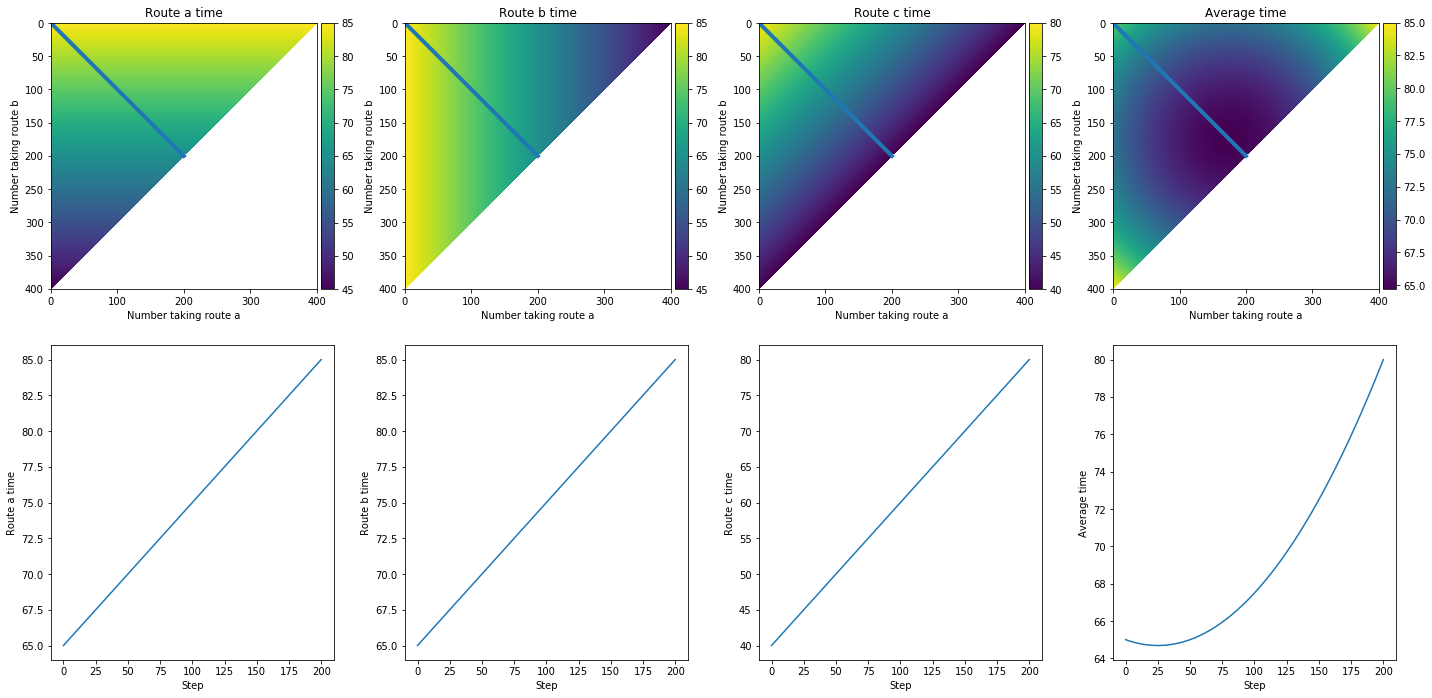

In [176]:
names = ["Route a time", "Route b time", "Route c time", "Average time"]
images = [tas, tbs, tcs, tavs]
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, (name, image) in enumerate(zip(names, images)):
    sc = axes[0, i].imshow(image)
    axes[0, i].plot(path[:, 0], path[:, 1], linewidth=4)
    axes[0, i].set_title(name)
    axes[0, i].set_xlabel("Number taking route a")
    axes[0, i].set_ylabel("Number taking route b")
    ax_divider = make_axes_locatable(axes[0, i])
    cax = ax_divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(sc, cax=cax, orientation='vertical')
    time_path = [image[y, x] for y, x in path[:, :2]]
    axes[1, i].plot(np.arange(len(time_path)), time_path)
    axes[1, i].set_xlabel("Step")
    axes[1, i].set_ylabel(name)
plt.tight_layout()
plt.show()

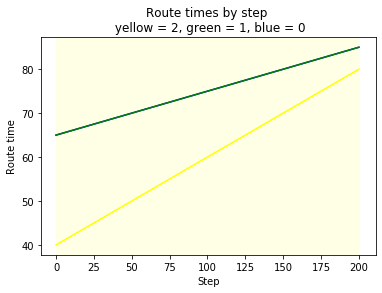

In [177]:
time_paths = []
colors = ['blue', 'green', 'yellow']
for image, color in zip(images[: 3], colors):
    time_path = [image[y, x] for y, x in path[:, :2]]
    time_paths.append(time_path)
    plt.plot(np.arange(len(time_path)), time_path, color=color)
time_paths = np.array(time_paths)
best_route_by_step = np.argmin(time_paths, axis=0)
for i, top_route in enumerate(best_route_by_step):
    plt.axvspan(i, i + 1, facecolor=colors[top_route], alpha=0.1)

plt.title("Route times by step \n yellow = 2, green = 1, blue = 0")
plt.xlabel("Step")
plt.ylabel("Route time")
plt.show()

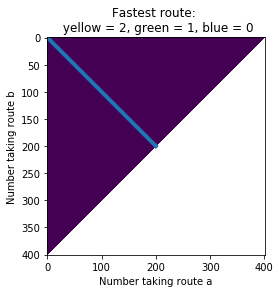

In [178]:
time_tensor = np.array([tas, tbs, tcs])
best_route = np.argmin(time_tensor, axis=0).astype(float)
best_route[np.any(np.isnan(time_tensor), axis=0)] = np.nan
plt.imshow(best_route, interpolation=None)
plt.plot(path[:, 0], path[:, 1], linewidth=4)
plt.title("Fastest route: \n yellow = 2, green = 1, blue = 0")
plt.xlabel("Number taking route a")
plt.ylabel("Number taking route b")
plt.show()